In [ ]:
# Mount My Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import gym
from functools import wraps
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from collections import deque
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
pd.set_option('display.max_columns', 10)

In [ ]:
def time_measure(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        print(f"Function '{func.__name__}' executed in {elapsed_time:.6f} seconds")
        return result
    return wrapper

In [ ]:
# Declare Path
path = '/content/drive/MyDrive/Colab Notebooks/input/excel/'

In [ ]:
# Declare Type File
xlsx = '.xlsx'

In [ ]:
# Declare File Name
files = 'DataDemo' + xlsx

In [ ]:
data2567, data2566, data2565, data2564 = None, None, None, None

In [ ]:
# Import Data
@time_measure
def import_data():
  global data2567, data2566, data2565, data2564
  data2567 = pd.read_excel(path + files, sheet_name='2567')
  data2566 = pd.read_excel(path + files, sheet_name='2566')
  data2565 = pd.read_excel(path + files, sheet_name='2565')
  data2564 = pd.read_excel(path + files, sheet_name='2564')

In [ ]:
def show_detail(
    shape = False,
    column = False,
    info = False,
    describe = False,
    is_null = False,
    type = False,
  ):
  global data2567, data2566, data2565, data2564
  if shape == True:
    print(f"data2567: {data2567.shape}")
    print(f"data2566: {data2566.shape}")
    print(f"data2565: {data2565.shape}")
    print(f"data2564: {data2564.shape}")
  #-----------------
  if column == True:
    print(f"data2567: {data2567.columns}")
    print(f"data2566: {data2566.columns}")
    print(f"data2565: {data2565.columns}")
    print(f"data2564: {data2564.columns}")
  #-----------------
  if info == True:
    print(f"data2567: {data2567.info}")
    print(f"data2566: {data2566.info}")
    print(f"data2565: {data2565.info}")
    print(f"data2564: {data2564.info}")
  #-----------------
  if describe == True:
    print(f"data2567: {data2567.describe}")
    print(f"data2566: {data2566.describe}")
    print(f"data2565: {data2565.describe}")
    print(f"data2564: {data2564.describe}")
  #-----------------
  if is_null == True:
    print(f"data2567: {data2567.isnull().sum()}")
    print(f"data2566: {data2566.isnull().sum()}")
    print(f"data2565: {data2565.isnull().sum()}")
    print(f"data2564: {data2564.isnull().sum()}")
  #-----------------
  if type == True:
    print(f"data2567: {data2567.dtypes}")
    print(f"data2566: {data2566.dtypes}")
    print(f"data2565: {data2565.dtypes}")
    print(f"data2564: {data2564.dtypes}")

In [ ]:
import_data()

Function 'import_data' executed in 484.764054 seconds


In [ ]:
show_detail(shape = True)

data2567: (469852, 17)
data2566: (646097, 17)
data2565: (459295, 17)
data2564: (209468, 17)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
show_detail(is_null = True)

data2567: Demo_Member             0
Birth_date              0
Member_Sex              0
Dept                    0
Dept_Desc               0
                    ...  
TransAmount             0
TransFee                0
TransAppVersion         0
TransOSPlatform     27446
TransDeviceModel    27446
Length: 17, dtype: int64
data2566: Demo_Member             0
Birth_date              0
Member_Sex              0
Dept                    0
Dept_Desc               0
                    ...  
TransAmount             0
TransFee                0
TransAppVersion         0
TransOSPlatform     35111
TransDeviceModel    35111
Length: 17, dtype: int64
data2565: Demo_Member             0
Birth_date              0
Member_Sex              0
Dept                    0
Dept_Desc               0
                    ...  
TransAmount             0
TransFee                0
TransAppVersion         0
TransOSPlatform     16812
TransDeviceModel    16812
Length: 17, dtype: int64
data2564: Demo_Member             0
B

In [ ]:
show_detail(column = True)

data2567: Index(['Demo_Member', 'Birth_date', 'Member_Sex', 'Dept', 'Dept_Desc',
       'Tran_Date', 'Tran_Time', 'TransCoopCode', 'TransCode', 'TransType',
       'TransBankApi', 'TransBankCode', 'TransAmount', 'TransFee',
       'TransAppVersion', 'TransOSPlatform', 'TransDeviceModel'],
      dtype='object')
data2566: Index(['Demo_Member', 'Birth_date', 'Member_Sex', 'Dept', 'Dept_Desc',
       'Tran_Date', 'Tran_Time', 'TransCoopCode', 'TransCode', 'TransType',
       'TransBankApi', 'TransBankCode', 'TransAmount', 'TransFee',
       'TransAppVersion', 'TransOSPlatform', 'TransDeviceModel'],
      dtype='object')
data2565: Index(['Demo_Member', 'Birth_date', 'Member_Sex', 'Dept', 'Dept_Desc',
       'Tran_Date', 'Tran_Time', 'TransCoopCode', 'TransCode', 'TransType',
       'TransBankApi', 'TransBankCode', 'TransAmount', 'TransFee',
       'TransAppVersion', 'TransOSPlatform', 'TransDeviceModel'],
      dtype='object')
data2564: Index(['Demo_Member', 'Birth_date', 'Member_Sex', 'Dep

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
show_detail(type = True)

data2567: Demo_Member           int64
Birth_date            int64
Member_Sex           object
Dept                  int64
Dept_Desc            object
                     ...   
TransAmount         float64
TransFee              int64
TransAppVersion      object
TransOSPlatform      object
TransDeviceModel     object
Length: 17, dtype: object
data2566: Demo_Member           int64
Birth_date            int64
Member_Sex           object
Dept                  int64
Dept_Desc            object
                     ...   
TransAmount         float64
TransFee              int64
TransAppVersion      object
TransOSPlatform      object
TransDeviceModel     object
Length: 17, dtype: object
data2565: Demo_Member           int64
Birth_date            int64
Member_Sex           object
Dept                  int64
Dept_Desc            object
                     ...   
TransAmount         float64
TransFee              int64
TransAppVersion      object
TransOSPlatform      object
TransDeviceModel     o

In [ ]:
show_detail(info = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


data2567: <bound method DataFrame.info of         Demo_Member  Birth_date Member_Sex  Dept             Dept_Desc  ...  \
0          19760448    19750509          F  2301         คณะแพทยศาสตร์  ...   
1          19760448    19750509          F  2301         คณะแพทยศาสตร์  ...   
2          19809202    19791122          F  1204       คณะพยาบาลศาสตร์  ...   
3          19809202    19791122          F  1204       คณะพยาบาลศาสตร์  ...   
4          19814228    19801016          M  2301         คณะแพทยศาสตร์  ...   
...             ...         ...        ...   ...                   ...  ...   
469847     19812655    19800711          F  2301         คณะแพทยศาสตร์  ...   
469848     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469849     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469850     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469851     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   

        T

In [ ]:
show_detail(describe = True)

data2567: <bound method NDFrame.describe of         Demo_Member  Birth_date Member_Sex  Dept             Dept_Desc  ...  \
0          19760448    19750509          F  2301         คณะแพทยศาสตร์  ...   
1          19760448    19750509          F  2301         คณะแพทยศาสตร์  ...   
2          19809202    19791122          F  1204       คณะพยาบาลศาสตร์  ...   
3          19809202    19791122          F  1204       คณะพยาบาลศาสตร์  ...   
4          19814228    19801016          M  2301         คณะแพทยศาสตร์  ...   
...             ...         ...        ...   ...                   ...  ...   
469847     19812655    19800711          F  2301         คณะแพทยศาสตร์  ...   
469848     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469849     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469850     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   
469851     19701722    19691222          M  5401  วิทยาเขตสุราษฎร์ธานี  ...   

       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


data2566: <bound method NDFrame.describe of         Demo_Member  Birth_date Member_Sex  Dept           Dept_Desc  ...  \
0          19840485    19821228          M  2301       คณะแพทยศาสตร์  ...   
1          19840485    19821228          M  2301       คณะแพทยศาสตร์  ...   
2          19840485    19821228          M  2301       คณะแพทยศาสตร์  ...   
3          19840485    19821228          M  2301       คณะแพทยศาสตร์  ...   
4          19840485    19821228          M  2301       คณะแพทยศาสตร์  ...   
...             ...         ...        ...   ...                 ...  ...   
646092     19759743    19750321          F  1208  คณะอุตสาหกรรมเกษตร  ...   
646093     19759743    19750321          F  1208  คณะอุตสาหกรรมเกษตร  ...   
646094     19759743    19750321          F  1208  คณะอุตสาหกรรมเกษตร  ...   
646095     19871049    19850801          F  2301       คณะแพทยศาสตร์  ...   
646096     19871049    19850801          F  2301       คณะแพทยศาสตร์  ...   

        TransAmount TransFee  T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


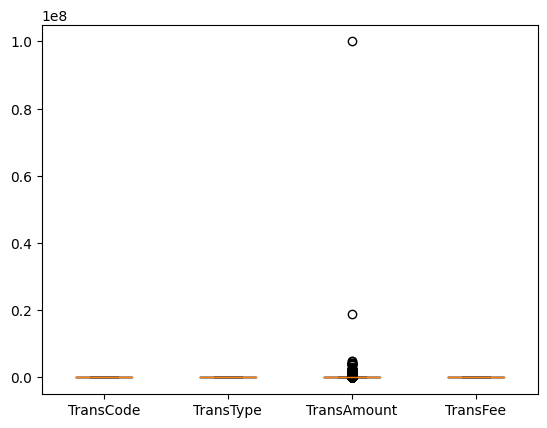

In [ ]:
plt.boxplot([data2567['TransCode'], data2567['TransType'], data2567['TransAmount'], data2567['TransFee']], labels=['TransCode', 'TransType', 'TransAmount', 'TransFee'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


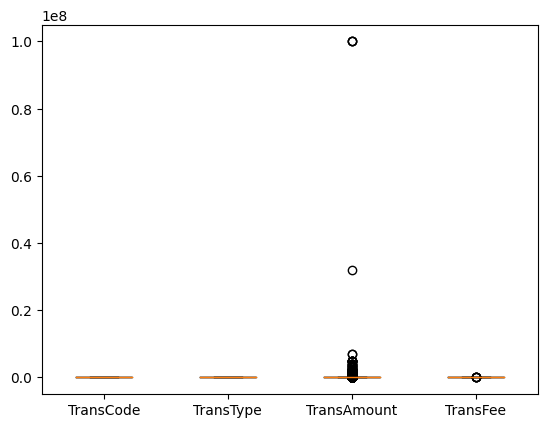

In [ ]:
plt.boxplot([data2566['TransCode'], data2566['TransType'], data2566['TransAmount'], data2566['TransFee']], labels=['TransCode', 'TransType', 'TransAmount', 'TransFee'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


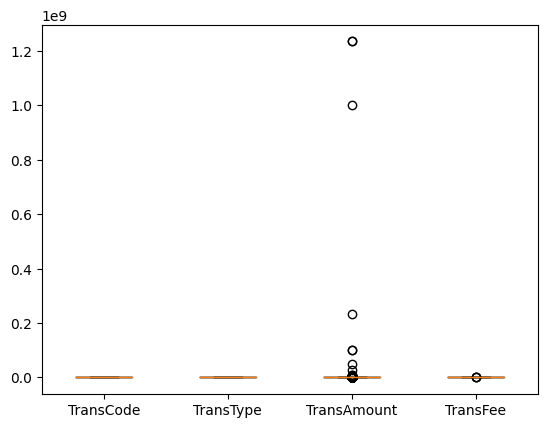

In [ ]:
plt.boxplot([data2565['TransCode'], data2565['TransType'], data2565['TransAmount'], data2565['TransFee']], labels=['TransCode', 'TransType', 'TransAmount', 'TransFee'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


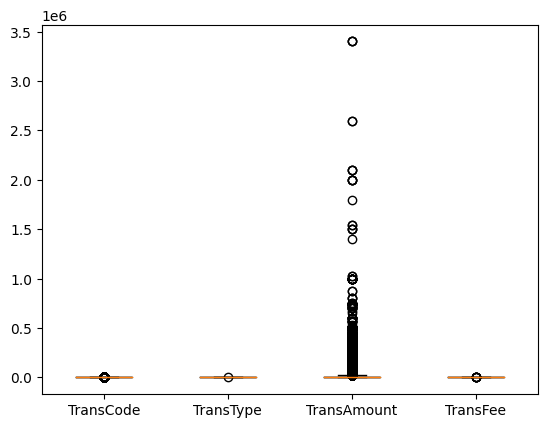

In [ ]:
plt.boxplot([data2564['TransCode'], data2564['TransType'], data2564['TransAmount'], data2564['TransFee']], labels=['TransCode', 'TransType', 'TransAmount', 'TransFee'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


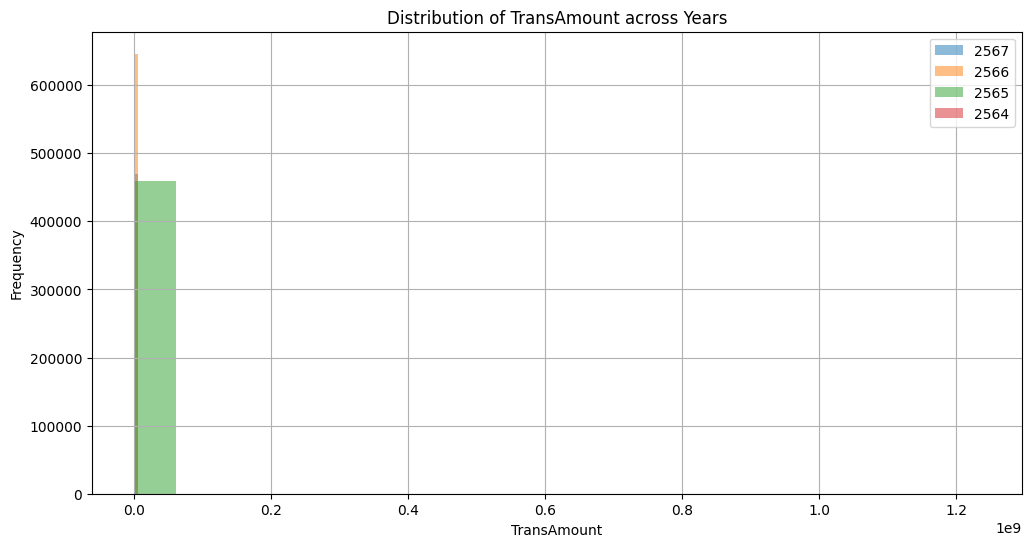

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data2567['TransAmount'], bins=20, alpha=0.5, label='2567')
plt.hist(data2566['TransAmount'], bins=20, alpha=0.5, label='2566')
plt.hist(data2565['TransAmount'], bins=20, alpha=0.5, label='2565')
plt.hist(data2564['TransAmount'], bins=20, alpha=0.5, label='2564')
plt.xlabel('TransAmount')
plt.ylabel('Frequency')
plt.title('Distribution of TransAmount across Years')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Convert Tran_Date to datetime and extract the month and year
data2564['Tran_Date'] = pd.to_datetime(data2564['Tran_Date'], format='%Y%m%d')
data2564['YearMonth'] = data2564['Tran_Date'].dt.to_period('M')

# Get the unique TransCode counts by month
transcode_counts = data2564.groupby(['YearMonth', 'TransCode']).size().unstack(fill_value=0)

transcode_counts

TransCode,1101,1201,2101,2102,3101
YearMonth,,,,,
2021-01,30,117,0,0,17
2021-02,48,711,0,0,56
2021-03,238,5279,0,0,1069
2021-04,620,13567,0,0,2189
2021-05,472,13547,0,0,3357
...,...,...,...,...,...
2021-08,466,17656,0,6,4179
2021-09,491,17307,0,0,4329
2021-10,583,19552,0,0,5118


In [ ]:
# Convert Tran_Date to datetime and extract the month and year
data2567['Tran_Date'] = pd.to_datetime(data2567['Tran_Date'], format='%Y%m%d')
data2567['YearMonth'] = data2567['Tran_Date'].dt.to_period('M')

# Get the unique TransCode counts by month
transcode_counts = data2567.groupby(['YearMonth', 'TransCode']).size().unstack(fill_value=0)

transcode_counts

TransCode,1101,1201,1301,2101,2102,3101
YearMonth,,,,,,
2024-01,1295,40608,0,6956,738,8063
2024-02,1213,34561,0,6759,740,6905
2024-03,1916,54969,0,6962,771,5809
2024-04,1260,40658,144,6607,797,7634
2024-05,1263,42331,4,6331,853,8406
2024-06,1307,39381,4,6689,831,7886
2024-07,1204,40078,21,6926,867,8192
2024-08,1276,39015,21,6972,843,8003
2024-09,137,3978,0,682,98,888


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Combine all the data into one DataFrame
combined_data = pd.concat([data2564, data2565, data2566, data2567])

# Convert Tran_Date to datetime and extract the month and year
combined_data['Tran_Date'] = pd.to_datetime(combined_data['Tran_Date'], format='%Y%m%d')
combined_data['Birth_date'] = pd.to_datetime(combined_data['Birth_date'], format='%Y%m%d')

# Calculate age at the time of the transaction
combined_data['Age'] = (combined_data['Tran_Date'] - combined_data['Birth_date']).dt.days // 365

# Define age ranges, including 51-60 and 61+
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
combined_data['AgeRange'] = pd.cut(combined_data['Age'], bins=bins, labels=labels, right=False)

# Extract year and month for grouping
combined_data['YearMonth'] = combined_data['Tran_Date'].dt.to_period('M')

# Count TransCode occurrences by month and age range, setting observed=False for compatibility
transcode_counts_by_age = combined_data.groupby(['YearMonth', 'AgeRange', 'TransCode'], observed=False).size().unstack(fill_value=0)

# Reindex to ensure all age ranges are included, filling with 0 where necessary
all_age_ranges = pd.Categorical(labels, categories=labels, ordered=True)

# Fill missing values with 0 to ensure complete data for all age ranges
transcode_counts_by_age = transcode_counts_by_age.fillna(0)

# Display the final DataFrame
transcode_counts_by_age

TransCode           1101   1201  1301  2101  2102  3101
YearMonth AgeRange                                     
2021-01   0-18         0      0     0     0     0     0
          19-30        2     44     0     0     0     0
          31-40        6     31     0     0     0     3
          41-50       20     24     0     0     0    14
          51-60        0     14     0     0     0     0
          61+          2      4     0     0     0     0
2021-02   0-18         0      0     0     0     0     0
          19-30       13    152     0     0     0     3
          31-40        6    176     0     0     0    15
          41-50       19    188     0     0     0    25
          51-60        0    104     0     0     0    10
          61+         10     91     0     0     0     3
2021-03   0-18         0      0     0     0     0     0
          19-30       27    523     0     0     0    62
          31-40       75   1974     0     0     0   459
          41-50       51   1537     0     0     0   367
          51-60       56    837     0     0     0   127
          61+         29    408     0     0     0    54
2021-04   0-18         0      0     0     0     0     0
          19-30       51    969     0     0     0   121
          31-40      204   4931     0     0     0   991
          41-50      170   4451     0     0     0   733
          51-60      149   2350     0     0     0   242
          61+         46    866     0     0     0   102
2021-05   0-18         0      0     0     0     0     0
          19-30       42    890     0     0     0   158
          31-40      144   5172     0     0     0  1557
          41-50      129   4702     0     0     0  1146
          51-60      111   2168     0     0     0   369
          61+         46    615     0     0     0   127
2021-06   0-18         0      0     0     0     0     0
          19-30       42   1038     0     0     0   216
          31-40      135   6905     0     0     0  1704
          41-50      179   5710     0     0     0  1334
          51-60      104   3151     0     0     0   493
          61+         32   1034     0     0     0   155
2021-07   0-18         0      0     0     0     0     0
          19-30       41   1325     0     0     0   205
          31-40      184   7599     0     0     0  1681
          41-50      187   6485     0     0     0  1291
          51-60      158   3626     0     0     0   611
          61+         43   1031     0     0     0   159
2021-08   0-18         0      0     0     0     0     0
          19-30       49   1087     0     0     6   246
          31-40      127   6412     0     0     0  1607
          41-50      152   5586     0     0     0  1529
          51-60      101   3438     0     0     0   622
          61+         37   1133     0     0     0   175
2021-09   0-18         0      0     0     0     0     0
          19-30       39   1089     0     0     0   271
          31-40      115   6694     0     0     0  1739
          41-50      150   5422     0     0     0  1529
          51-60      136   3143     0     0     0   658
          61+         51    959     0     0     0   132
2021-10   0-18         0      0     0     0     0     0
          19-30       39   1311     0     0     0   242
          31-40      184   7137     0     0     0  1937
          41-50      195   6557     0     0     0  1979
          51-60      123   3389     0     0     0   779
          61+         42   1158     0     0     0   181
2021-11   0-18         0      0     0     0     0     0
          19-30       42   1321     0     1     2   283
          31-40      111   6980     0     2     3  1956
          41-50      172   6375     0     0     0  1796
          51-60      121   3452     0     0     0   720
          61+         39   1188     0     0     0   230
2021-12   0-18         0      0     0     0     0     0
          19-30       56   1442     0     0     6   338
          31-40      119   7374     0     0     4  2117
          41-50      181

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


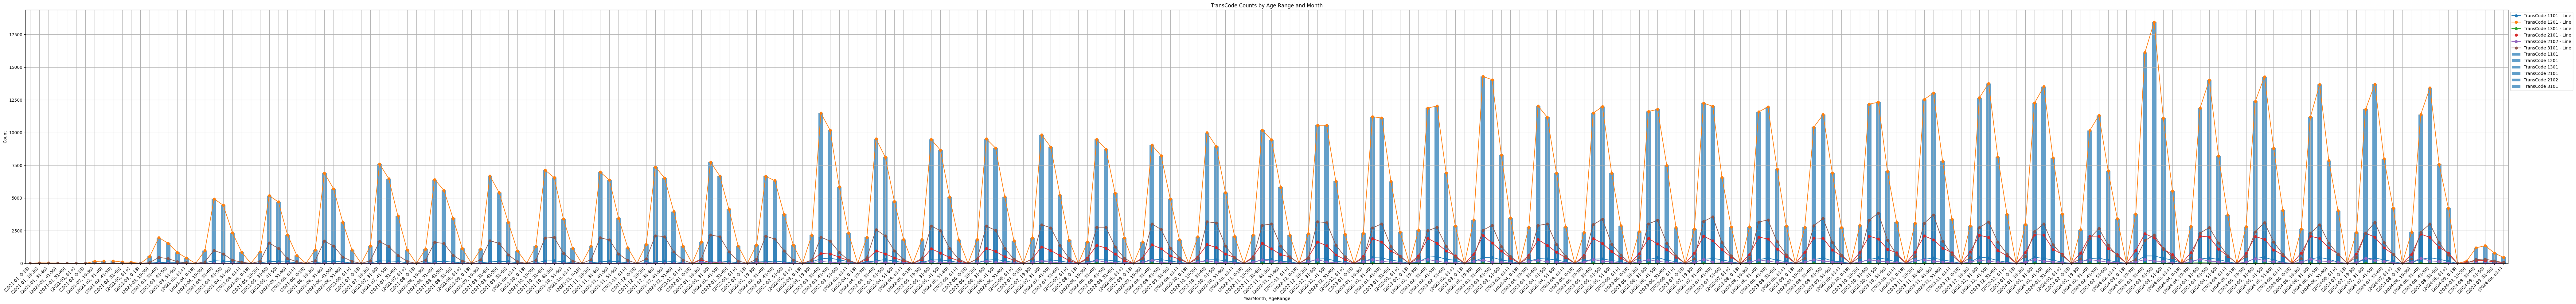

In [ ]:
# Plotting
plt.figure(figsize=(84, 10))
for transcode in transcode_counts_by_age.columns:
    transcode_counts_by_age[transcode].plot(kind='bar', label=f'TransCode {transcode}', alpha=0.7)
    transcode_counts_by_age[transcode].plot(marker='o', label=f'TransCode {transcode} - Line')

# Adding labels and legend
plt.title('TransCode Counts by Age Range and Month')
plt.xlabel('YearMonth, AgeRange')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
model_rf, model_svm, model_nn= None, None, None

In [ ]:
X_train, X_test, y_train, y_test = None, None, None, None

In [ ]:
# Prepare the data for the model
data = transcode_counts_by_age.reset_index()
data['YearMonth'] = data['YearMonth'].astype(str)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(data[['AgeRange']], drop_first=True)  # Only AgeRange for now
X = pd.concat([X, data[transcode_counts_by_age.columns]], axis=1) # Add TransCode columns

# Create the target variable (e.g., predicting counts for a specific TransCode)
target_columns = transcode_counts_by_age.columns  # All TransCodes as targets
y = X[target_columns]

# Ensure column names are strings
X.columns = X.columns.astype(str)  # Convert all column names to strings
y.columns = y.columns.astype(str)  # Convert all column names to strings

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the dummy column names from training data
age_range_dummy_cols = X_train.columns[X_train.columns.str.startswith('AgeRange_')]

In [ ]:
@time_measure
def random_forest(transcode_counts_by_age):
  global model_rf
  global X_train, X_test, y_train, y_test

  # Create and train the Random Forest model
  model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
  model_rf.fit(X_train, y_train)

  # Prepare data for prediction in 2024 OCT
  future_year_months = pd.date_range(start='2024-10-01', end='2024-10-31', freq='ME').to_period('M')
  age_ranges = labels

  # Create DataFrame for future predictions
  future_data = []
  for month in future_year_months:
      for age_range in age_ranges:
          future_data.append({'YearMonth': month, 'AgeRange': age_range})
  future_data = pd.DataFrame(future_data)

  # Convert categorical variables to dummy/indicator variables
  future_X = pd.get_dummies(future_data[['AgeRange']], drop_first=True)
  # Align with training data columns (excluding TransCode columns which are targets)
  future_X = future_X.reindex(columns=X_train.columns[X_train.columns.str.startswith('AgeRange_')], fill_value=0)

  # Add TransCode columns to future_X, initializing with 0 and ensuring string column names
  for transcode in transcode_counts_by_age.columns:
      future_X[str(transcode)] = 0  # Convert transcode to string for column name

  # Make predictions for 2024 OCT
  future_predictions = model_rf.predict(future_X)

  # Create DataFrame for predictions
  predictions_df = pd.DataFrame(future_predictions, columns=target_columns)
  predictions_df = pd.concat([future_data, predictions_df], axis=1)

  # Reshape to match transcode_counts_by_age format
  predictions_by_age = predictions_df.groupby(['YearMonth', 'AgeRange'])[target_columns].sum().unstack(fill_value=0)

  # Display the predictions
  return predictions_by_age

In [ ]:
predictions_by_age = random_forest(transcode_counts_by_age)
for column in predictions_by_age.columns:
    predictions_by_age.loc[predictions_by_age[column] < 0, column] = 0
    predictions_by_age.loc[:, column] = predictions_by_age[column].apply(np.ceil)
    predictions_by_age[column] = predictions_by_age[column].astype(int)
predictions_by_age

Function 'random_forest' executed in 0.212929 seconds


1101                             1201                              \
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+   
YearMonth                                                                     
2024-10      0     1     0     1     0   1    0     4     0     1     5   1   

          1301                             2101                              \
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+   
YearMonth                                                                     
2024-10      0     0     0     0     0   0    0     0     0     0     0   0   

          2102                             3101                              
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+  
YearMonth                                                                    
2024-10      0     0     0     0     0   0    0     1     0     1     0   0

In [ ]:
@time_measure
def svm_regression(transcode_counts_by_age):
  global model_svm
  global X_train, X_test, y_train, y_test
  # Prepare the data for the model
  data = transcode_counts_by_age.reset_index()
  data['YearMonth'] = data['YearMonth'].astype(str)

  # Convert categorical variables to dummy/indicator variables
  X = pd.get_dummies(data[['AgeRange']], drop_first=True)  # Only AgeRange for now
  X = pd.concat([X, data[transcode_counts_by_age.columns]], axis=1) # Add TransCode columns

  # Create the target variable (e.g., predicting counts for a specific TransCode)
  target_columns = transcode_counts_by_age.columns  # All TransCodes as targets
  y = X[target_columns]

  # Ensure column names are strings
  X.columns = X.columns.astype(str)  # Convert all column names to strings
  y.columns = y.columns.astype(str)  # Convert all column names to strings

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Create and train the SVM model (using SVR for regression)
  model_svm = MultiOutputRegressor(SVR(kernel='rbf'))  # You can try different kernels like 'linear', 'poly'
  model_svm.fit(X_train, y_train)

  # Prepare data for prediction in 2024 OCT
  future_year_months = pd.date_range(start='2024-10-01', end='2024-10-31', freq='ME').to_period('M')
  age_ranges = labels

  # Create DataFrame for future predictions
  future_data = []
  for month in future_year_months:
      for age_range in age_ranges:
          future_data.append({'YearMonth': month, 'AgeRange': age_range})
  future_data = pd.DataFrame(future_data)

  # Convert categorical variables to dummy/indicator variables
  future_X = pd.get_dummies(future_data[['AgeRange']], drop_first=True)
  # Get the dummy column names from training data
  age_range_dummy_cols = X_train.columns[X_train.columns.str.startswith('AgeRange_')]
  # Align with training data columns (excluding TransCode columns which are targets)
  future_X = future_X.reindex(columns=age_range_dummy_cols, fill_value=0)

  # Add TransCode columns to future_X, initializing with 0 and ensuring string column names
  for transcode in transcode_counts_by_age.columns:
      future_X[str(transcode)] = 0  # Convert transcode to string for column name

  # Make predictions for 2024 OCT
  future_predictions = model_svm.predict(future_X)

  # Create DataFrame for predictions
  predictions_df = pd.DataFrame(future_predictions, columns=target_columns)
  predictions_df = pd.concat([future_data, predictions_df], axis=1)

  # Reshape to match transcode_counts_by_age format
  predictions_by_age = predictions_df.groupby(['YearMonth', 'AgeRange'])[target_columns].sum().unstack(fill_value=0)

  # Display the predictions
  return predictions_by_age

In [ ]:
# Call the function to get the predictions from SVM model
predictions_by_age = svm_regression(transcode_counts_by_age)

# Ensure non-negative values and round up
for column in predictions_by_age.columns:
    predictions_by_age.loc[predictions_by_age[column] < 0, column] = 0
    predictions_by_age.loc[:, column] = predictions_by_age[column].apply(np.ceil)
    predictions_by_age[column] = predictions_by_age[column].astype(int)

predictions_by_age

Function 'svm_regression' executed in 0.130163 seconds


1101                              1201                          \
AgeRange  0-18 19-30 31-40 41-50 51-60 61+  0-18 19-30 31-40 41-50 51-60   
YearMonth                                                                  
2024-10     90    90    90    90    90  90  3200  3200  3200  3200  3200   

                1301                             2101                          \
AgeRange    61+ 0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60   
YearMonth                                                                       
2024-10    3200    1     1     1     1     1   1  408   408   408   408   408   

               2102                             3101                          \
AgeRange   61+ 0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60   
YearMonth                                                                      
2024-10    408   11    11    11    11    11  11  566   566   566   566   566   

                
AgeRange   61+  
YearMonth       
2024-10    566

In [ ]:
@time_measure
def neural_net(transcode_counts_by_age, epochs=100):
  global model_nn
  global X_train, X_test, y_train, y_test

  # Get the columns before scaling
  X_train_columns = X_train.columns

  # Scale the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # Create the neural network model
  model_nn = tf.keras.models.Sequential([
      tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(len(target_columns))  # Output layer with number of TransCodes
  ])

  # Compile the model
  model_nn.compile(optimizer='adam', loss='mse')  # Mean squared error for regression

  # Train the model
  model_nn.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test))

  # Prepare data for prediction in 2024 OCT
  future_year_months = pd.date_range(start='2024-10-01', end='2024-10-31', freq='ME').to_period('M')
  age_ranges = labels

  # Create DataFrame for future predictions
  future_data = []
  for month in future_year_months:
      for age_range in age_ranges:
          future_data.append({'YearMonth': month, 'AgeRange': age_range})
  future_data = pd.DataFrame(future_data)

  # Convert categorical variables to dummy/indicator variables
  future_X = pd.get_dummies(future_data[['AgeRange']], drop_first=True)

  # Use X_train_columns instead of X_train.columns
  future_X = future_X.reindex(columns=X_train_columns[X_train_columns.str.startswith('AgeRange_')], fill_value=0)

  # Add TransCode columns to future_X, initializing with 0 and ensuring string column names
  for transcode in transcode_counts_by_age.columns:
      future_X[str(transcode)] = 0  # Convert transcode to string for column name

  # Scale the future data
  future_X_scaled = scaler.transform(future_X) # Scale the future_X DataFrame using the same scaler

  # Make predictions for 2024 using the scaled future data
  future_predictions = model_nn.predict(future_X_scaled)

  # Create DataFrame for predictions
  predictions_df = pd.DataFrame(future_predictions, columns=target_columns)
  predictions_df = pd.concat([future_data, predictions_df], axis=1)

  # Reshape to match transcode_counts_by_age format
  predictions_by_age = predictions_df.groupby(['YearMonth', 'AgeRange'])[target_columns].sum().unstack(fill_value=0)

  # Display the predictions
  return predictions_by_age

In [65]:
predictions_by_age = neural_net(transcode_counts_by_age, epochs=3500)
for column in predictions_by_age.columns:
    predictions_by_age.loc[predictions_by_age[column] < 0, column] = 0
    predictions_by_age.loc[:, column] = predictions_by_age[column].apply(np.ceil)
    predictions_by_age[column] = predictions_by_age[column].astype(int)
predictions_by_age

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
Epoch 1002/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19048.0195 - val_loss: 14715.1924
Epoch 1003/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19680.4180 - val_loss: 14705.6689
Epoch 1004/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22327.2227 - val_loss: 14665.3818
Epoch 1005/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21535.2344 - val_loss: 14646.5791
Epoch 1006/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22851.5664 - val_loss: 14592.3164
Epoch 1007/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22075.0449 - val_loss: 14573.1826
Epoch 1008/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20470.3887 - val_loss: 14588.5586
Epoch 1009/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25246.4102 - val_loss: 14596.8633
Epoch 1010/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19441.8711 - val_loss: 14498.3984
Epoch 1011/3500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21983.5801 - val_loss: 14446.

1101                             1201                              \
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+   
YearMonth                                                                     
2024-10      0     8    12    16    23  26    0    25    16    95    35   0   

          1301                             2101                              \
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+   
YearMonth                                                                     
2024-10      0     0     4     0     3   0    0     0     8    69    17   0   

          2102                             3101                              
AgeRange  0-18 19-30 31-40 41-50 51-60 61+ 0-18 19-30 31-40 41-50 51-60 61+  
YearMonth                                                                    
2024-10      1     6     0     2     0   4    0    44     0     0     0  12

In [66]:
# Make predictions on the test set for Random Forest
y_pred_rf = model_rf.predict(X_test)

# Calculate error metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Make predictions on the test set for SVM
y_pred_svm = model_svm.predict(X_test)

# Calculate error metrics for Neural Network
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Make predictions on the test set for Neural Network
y_pred_nn = model_nn.predict(X_test.astype(float))

# Calculate error metrics for Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Create a table to compare errors
error_comparison = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE'],
    'Random Forest': [mse_rf, rmse_rf, mae_rf],
    'SVM': [mse_svm, rmse_svm, mae_svm],
    'Neural Network': [mse_nn, rmse_nn, mae_nn],
})

print("\nError Comparison Table:")
error_comparison

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  w

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Error Comparison Table:


,Metric,Random Forest,SVM,Neural Network
0,MSE,6.181015e+06,3.257112e+06,1734.243025
1,RMSE,6.181015e+06,3.257112e+06,1734.243025
2,MAE,9.807301e+02,8.053161e+02,21.073757
